# ensemble

>* 머리좀 모아보자!!!!<br>
> 1.Voting : 다수결 해보자!!!(모델을 여러개!)<br>
> 2.Bagging : 다양한 데이터에서 해보자!!(데이터셋이 여러개!)<br>
> 3.Boosting : 못하는 놈들 대리고 각자 장점 살려보자!!!<br>
> 4.Stacking : 나온 것으로 다시 또 돌려보자!!

<img src="img/01.png">

## voting

<img src="img/03.png">
<img src="img/02.png">

<img src="img/08.png">
<img src="img/09.png">

### Voting의 종류

>- Hard : 1인 1표제<br>
>- Soft : 잘 하는 의견 반영하자

<img src="img/04.png">

### Why Voting?

* [ 상황 ] 우선 분류를 하는 학습기 A,B,C가 존재하고, 이들은 각기 70%의 정확도를 보이고 있다.  
이러한 상황에서 이들을 모두 사용해서 다수결의 법칙으로 결정하고자 한다.  


In [1]:
#01) 3개의 분류기가 모두 다 맞출 확률 : 
case1 = 0.7*0.7*0.7
print (case1)

0.3429999999999999


In [2]:
# 02 ) 2개의 분류기가 맞추고, 1개가 틀릴 확률:
case2 =(0.7*0.7*0.3)*3
print (case2)

0.4409999999999999


In [3]:
# 03) 1개의 분류기가 맞추고, 2개가 틀릴 확률:
case3 = (0.3*0.3*0.7)*3
print (case3)

0.189


In [4]:
# 04) 3개의 분류기 모두 틀리는 확률:
case4 = 0.3*0.3*0.3
print (case4)

0.027


In [8]:
# 모든 경우가 위의 4가지의 경우로 분할이 된다.!!!
print (case1 + case2 + case3 + case4)

0.9999999999999999


* 위의 경우에서 살펴보면 다수결의 법칙(3개이니, 2개 이상이 맞는 경우)으로 생각을 하면 case1 + case2 가 되어서 0.784로 1개의 부류기의 0.7보다 높은 정확도를 보이는 것을 알 수 있다!!!!

In [9]:
print( case1 + case2)

0.7839999999999998


* 위의 경우에서는 70%의 정확도를 가지는 것을 3가지를 사용을 하였으나, 이것을 5개를 사용해서 처리하게 된다면 5개 모두 맞는 경우 + 4개 맞는 경우 + 3개 맞는 경우를 계산하면 된다. ---> 약 0.83% 로 향상이 됨!!!!!

In [6]:
import itertools
import numpy as np

# 조합에서는 모든 가능한 경우를 하고, 유니크한 경우를 추출하지 않아서 관련 함수를 만들어야 한다.
def get_uniq_row(arr1):
    y = np.ascontiguousarray(arr1).view(np.dtype((np.void, arr1.dtype.itemsize * arr1.shape[1])))
    # _ 는 그 위치에 해당하는 값을 무시하고 싶을 때!!!!!!!!!
    _,idx = np.unique(y, return_index=True)

    unique_result = arr1[idx]
    return unique_result

def multiple_values(arr1):
    temp = 0 # 최종 더하는 변수
    for i in arr1:
        temp1 = 1 # 각 경우마다의 원소의 곱을 처리하는 변수
        for j in i:
            temp1 *= j
        temp += temp1
    return temp

In [11]:
0.7*0.7*0.7*0.7*0.7

0.16806999999999994

In [7]:
# 모두 다 같은 경우
mylist = [0.7,0.7,0.7,0.7,0.7]
case1_list = [] # 곱으로 할 것이니!!!
for i in itertools.permutations(mylist, 5):
    case1_list.append(i)
case1_uniq = get_uniq_row(np.array(case1_list))
print (case1_uniq)
case1 = multiple_values(case1_uniq)
print (case1)

[[0.7 0.7 0.7 0.7 0.7]]
0.16806999999999994


In [8]:
# 4개 맞추고, 1개 틀리는 경우
mylist = [0.7,0.7,0.7,0.7,0.3]
case2_list = [] # 곱으로 할 것이니!!!
for i in itertools.permutations(mylist, 5):
    case2_list.append(i)
case2_uniq = get_uniq_row(np.array(case2_list))
print (case2_uniq)
case2 = multiple_values(case2_uniq)
print (case2)

[[0.3 0.7 0.7 0.7 0.7]
 [0.7 0.3 0.7 0.7 0.7]
 [0.7 0.7 0.3 0.7 0.7]
 [0.7 0.7 0.7 0.3 0.7]
 [0.7 0.7 0.7 0.7 0.3]]
0.3601499999999999


In [9]:
# 3개 맞고, 2개 틀리는 경우 
mylist = [0.7,0.7,0.7,0.3,0.3]
case3_list = [] # 곱으로 할 것이니!!!
for i in itertools.permutations(mylist, 5):
    case3_list.append(i)
case3_uniq = get_uniq_row(np.array(case3_list))
print (case3_uniq)
case3 = multiple_values(case3_uniq)
print (case3)

[[0.3 0.3 0.7 0.7 0.7]
 [0.3 0.7 0.3 0.7 0.7]
 [0.3 0.7 0.7 0.3 0.7]
 [0.3 0.7 0.7 0.7 0.3]
 [0.7 0.3 0.3 0.7 0.7]
 [0.7 0.3 0.7 0.3 0.7]
 [0.7 0.3 0.7 0.7 0.3]
 [0.7 0.7 0.3 0.3 0.7]
 [0.7 0.7 0.3 0.7 0.3]
 [0.7 0.7 0.7 0.3 0.3]]
0.3087


In [15]:
# 5개의 경우에는 83까지 향상이 됨!!!!
print (case1 + case2 + case3)

0.8369199999999999


### How 

그러면 어떠한 것들을 가지고 구성을 해야 좋을까? 초록이 동색? 아니면 다양한 의견을 가진 사람들을 모아서 하는 다양성의 관점??  
--> 일반적으로 상관관계가 적은 것들을 모아야지, 잘못된 것들의 수정가능성이 커진다. 같은 것들은 다 같이 오류를발생하고, 잘못된 것을 수정될 기회가 없기 떄문에..

>* case1) 유사한 것들로 구성  
> 1 1 1 1 1 1 1 1 1 1  # 오리지널  

>1 1 1 1 1 1 1 1 0 0  # 80퍼센트  
>1 1 1 1 1 1 1 1 0 0 # 80퍼센트  
>1 0 1 1 1 1 1 1 0 0 # 70처센트  

> ---> 위의 것으로 다수결 수행 시  
>1 1 1 1 1 1 1 1 0 0 # 여전히 80퍼센트로 오류가 수정이 안 됨!!!!!

In [10]:
a= np.array([1,1,1,1,1,1,1,1,1,1])
b= np.array([1,1,1,1,1,1,1,1,0,0])
c= np.array([1,1,1,1,1,1,1,1,0,0])
d= np.array([1,0,1,1,1,1,1,1,0,0])

# 위와 같이 하면 a 의 변화가 없으니 nan 이 나타나게 된다. --> 계산상 0으로 나눠서리;;
# ref)https://stackoverflow.com/questions/7653993/encountered-invalid-value-when-i-use-pearsonr
print (np.corrcoef(c,d))
print (np.corrcoef(b,a))

[[1.         0.76376262]
 [0.76376262 1.        ]]
[[ 1. nan]
 [nan nan]]


C:\Users\acorn-501\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\acorn-501\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


* 위와 같은 경우에는 t_test를 사용하는 것도 괜찮음!

In [11]:
from scipy import stats
print (stats.ttest_ind(a, b))
print (stats.ttest_ind(a, d))
print (stats.ttest_ind(b,c))
print (stats.ttest_ind(b,d))


Ttest_indResult(statistic=1.4999999999999998, pvalue=0.1509504521842674)
Ttest_indResult(statistic=1.9639610121239317, pvalue=0.06516948808048838)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.49319696191607226, pvalue=0.6278365031702049)


### 정리

>- 위의 경우에서보면 "다수의 법칙"은 분류의 경우가 다양하게 많은 문제에서 보다 적합하다. <br>
>- 그러면 의사결정에서 모든 사람들이 동등하게 1표를 행사하는 경우도 있지만, 전문가나 의사 결정권이 높거나 잘 하는 사람들에게 가중치를 주는 경우도 있고, 아니면 스포츠에서처럼 최고점/최저점 등에서 처리를 하여서 극단의 값을 제외하고 처리하는 등 여러가지 방법이 있다.  

* 아래 결과를 보면 여러가지의 분류기들을 하고, 이를 가지고 투표앙상블을 수행을 하는데, 모두 1표씩 하는 경우하고, 가중치를 두고 하는 경우하고 서로 다른 결과들을 보이는 것을 볼 수 있다. 그리고 이러한 것은 경진대회에서는 다만 얼마라도 향상시키기 위해서 사용하는 방법 중 하나가 되겠다!!!

<img src="img/05.png">

* 참고) 위에서 RF하고 Extra Trees 하고 2가지가 있는데 이 둘은 무엇이 다를까?  <br>
* ref) https://www.reddit.com/r/MachineLearning/comments/29uwi1/why_are_extremely_randomized_trees_more_efficient/  
* ref) http://www.montefiore.ulg.ac.be/~ernst/uploads/news/id63/extremely-randomized-trees.pdf.  

위의 사항들을 참고를 하면, 일반적인 RF 보다는 내부적으로 ensemble을 이용하여 보다  스무스하게 처리를 하는 Extra Trees Classifie  가 보다 조금 더 성능이 좋은 것을 나타내고 있다!!!

### 그럼 Regression 에서는?

>- 평균!!!

>- 회귀
<img src="img/06.png">
>- 분류
<img src="img/07.png">


### Scikit Learn에서 활용법 :아래는 4가지 경우에 대해서 알아본다.     
실은 직접 만들어서 사용해도 되고, 그래야 직접 확인하기에 편하기도 함!!

>1.Hard & 균일   
>2.Hard & 차등   
>3.Soft & 균일   
>4.Soft & 차등   

In [12]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Hard & 균일

In [13]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(max_iter=100000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( 
    estimators=[("LR",lr_clf),("KNN",knn_clf)],
    voting="hard"
)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.2 , 
                                                    random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


#### Hard & 차등

In [15]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(max_iter=100000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( 
    estimators=[("LR",lr_clf),("KNN",knn_clf)],
    voting="hard",
    weights=[4,1]
)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size=0.2,
    random_state=156
)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9649
LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


#### Soft & 균일 

In [16]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(max_iter=100000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(
    estimators=[("LR",lr_clf),("KNN",knn_clf)],
    voting="soft"
)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size=0.2,
    random_state=156
)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


#### Soft & 차등

In [18]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(max_iter=100000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(
    estimators=[("LR",lr_clf),("KNN",knn_clf)],
    voting="soft",
    weights=[4,1]
)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size=0.2,
    random_state=156
)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


## Bagging

### 기본 개념

<img src="img/10.png">

<img src="img/11.png">

단일 모델의 문제점 : 높은 bias로 인한 Underfitting, 높은 variance로 인한 Overfitting --> Bagging은 일종의 중간 값으로 회귀시기는 현상이 있기 때문에 Overfitting을 줄일 수 있는 장점이 있음.

### 대표적인 Random Forest

* 중요한 사항은 Tree에 있는 것이 아니라 Ensemble에 들어가 있다!!!
<img src="img/12.png">

In [19]:
import pandas as pd

In [20]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [23]:
# ????본인들 경로에 맞추어서 확인하셔야 합니다!!!!
# ????어제 한 예제 확인...

feature_name_df = pd.read_csv('UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
# 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
# DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

* 참고)   
.values : (n,1)    
.ravel : (n, )    

아래에서 rf_clf.fit(X_train , y_train) 할 때 에러가 발생할 경우에...

In [27]:

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train.values.ravel())
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### RF의 주요 파라미터    
아래의 경우에는 간략하게 gridsearchcv만 수행을 하고 넘어갈 것임

>- n_estimators : 결정 트리의 교ㅐ수를 지정. 기본은 10, 수가 클 수록 좋은 성능을 기대할 수는 있디만, 무조건 증가하면서 성능이 증가하는 것은 아님! 그리고 수행 속도가 문제가 될수 있음!!<br>
>- max_feature : 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt 수 만큼 참조한다. 전체 피처가 16개라면 4개를 참조.<br>
>- max_depth, min)sample_leaf 등도 앞의 DT와 동일한 기능임

In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[100],
    "max_depth":[6,8,10,12],
    "min_samples_leaf":[8,12,18],
    "min_samples_split":[8,16,20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0,
                               n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,
                      param_grid=params,
                      cv=2,
                      n_jobs=-1)
grid_cv.fit(X_train,y_train.values.ravel())


print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [32]:
rf_clf1 = RandomForestClassifier(n_estimators=100,
                                 max_depth=10,
                                 min_samples_leaf=8,
                                 min_samples_split=8,
                                 random_state=0)
rf_clf1.fit(X_train,y_train.values.ravel())
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9196


In [37]:
rf_clf2=grid_cv.best_estimator_
pred2 =rf_clf2.predict(X_test)
accuracy_score(y_test,pred2)

0.9195792331184255

### 변수 중요도

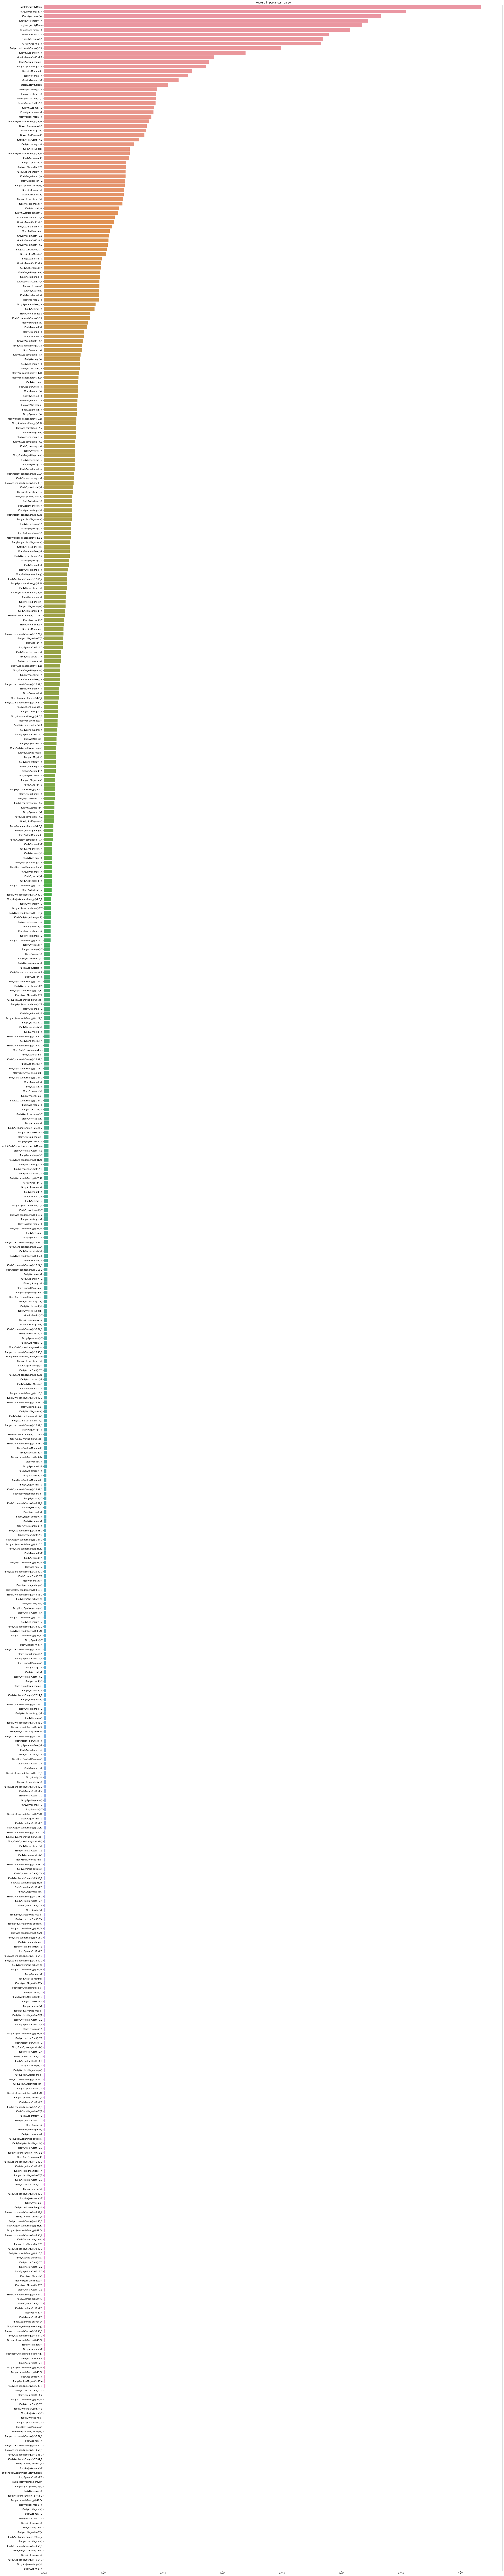

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Top 20 중요 변수 선택
ftr_importances_values = rf_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,
                           index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)#[:20]

plt.figure(figsize=(40,230))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

## Boosting

>- 기본적으로 약한 분류기들을 결합하여 강한 분류기를 만드는 과정임<br>
>- 즉, 기본적인 것은 각자 개인이 잘하는 부분을 가지고, 한 사람이 본인이 자신이 있는 문제들만 풀면서 못 푸는 것은 다음으로 패스하는 방식으로, 최종적으로는 여러 사람이 다 잘하는 고유의 영역을 풀어서 전체 성능이 올라가는 것<br>
예 : 수능 수학 문제를 푸는데, A는 계산을 잘하고, B는 함수를 잘 하고, C는 기하를 잘 한다고 할 때, 시험 문제지를 받아서 A가 먼저 본인이 자신이 있는 연산 문제들을 해결을 하고, B 한테 패스를 하고, B는 이를 받아서 본인이 자신이 있는 함수 단원의 문제들을 해결을 하고, C한테 넘기면, C는 본인이 자신이 있는 기하를 풀어서, 전체적으로 시험을 잘 보자는 의미!!!

<img src="img/13.png">
<img src="img/14.png">

### GBM : Gradient Boosting Machine

* 참고로 이 GBM은 병렬지원이 불가능 하다;;;속도가;;;ㅠ --> 그래서 xgboost가 대박남!!!  ---> 그래서 GBM은 잘 안사용하고,,,,xgboost로 그냥 넘어간다;;;  --> 기본적으로 느린데;;;거기에 HyperParameter 튜닝은 어찌;;;;ㅠㅠ

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
import time


## 데이터는 아까 데이터 그대로 사용!!!!!!



# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train.values.ravel())
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9382
GBM 수행 시간: 464.1 초 


* 어차피 잘 사용하지 않기에....아래는 그냥 PASS

In [ ]:
????
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train.values.ravel())
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))


### XGBoost

>- 설치 : 윈도우 터미널(관리자 권한으로)   
> >conda install -c anaconda py-xgboost   

In [1]:
import xgboost

print(xgboost.__version__)

0.90


#### 특징

<img src="img/15.png">

#### 주요 파라미터

>- 일반파라미터 : 구동 시 관련 시스템 설정 관련 -> 거의 변경하지 않음;;<br>
>- 부스터 파라미터 : 트리 최적화, 부스팅, 제약 등 파라미터 설정<br>
>- 학습 테스크 관련 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표 등 설정<br>

> **일반파라미터**<br>
>- booster : gbtree가 기본, gblinear 등이 있음<br>
>- silent : 0이 기본값, 출력 메시지를 나타내고 싶지 않을 때 1로 설정<br>
>- nthread : CPU의 실행 스레드를 조정한다. 기본값은 전체 다 사용!!!

> **주요 부스터 파라미터**<br>
>- eta / learning_rate : GBM의 학습률 관련 파라미터 0 ~ 1사이의 값 지정, 기본값은 0.3임. 보통은 0.01 ~ 0.2 정도를 선호한다고는 함;;<br>
>- num_boost_rounds : GBM의 n_estimator와 같은 파라미터. 즉, 약분류기의 개수에 해당하는 것<br>
>- min_child_weight : 기본1, 트리에서 추가적으로 가지를 나눌지를 결정하기 위한 필요한 데이터들의 weight총합. 이 값이 클수록 분할을 자제한다... pverfitting을 조절하기 위해서 사용을 함!!!!!!<br>
>- gamma / min_split_loss : 기본0. 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값임. 해당 값 보다 큰 손실이 감소되는 경우에 리프 노드를 분리한다. 값이 클 수록 overfitting을 줄이는 효과가 있음!!!<br>
>- max_depth : 기본 6. 앞에서와 같음.이 값이 높으면, overfitting의 위험성이 있음. 보통은 3~10으로 사용을 하기는 함.....<br>
>- sub_sample : 기본값1. GBM의 subsample과 동일.과적합을 피하기 위해서 전체 데이터를 다 사용하지 않고, 특정 비율의 데이터만 사용하고자 할 때 비율지정. 일반적으로 0.5~1사이의 값을 사용<br>
>- colsample_bytree : GBM의 Max_feature와 유사함. 기본값은 1. 트리 생성에 필요한 컬럼을 임의로 샘플링 하는데 사용됨. 매우 많은 피처가 있는 경우 overfitting을 조절하기 위해서 사용함.<br>
>- lambda : L2 규제를 적용감. 피처의 수가 많을 경우 적용을 검토하여 값이 클수록 overfitting 감소 효과가 있다.<br>
>- alpha : L1 규제 적용. 위와 유사<br>
>- scale_pos_weight : 특정 값으로 치우친 비대칭한 클래스로 구성된 세트의 균형을 유지하기 위한 파라미터. 기본값은 1/


> **학습 테스크 파라미터**<br>
>- object : 최소값을 가져야 할 손실함수를 정의한다. xgboost는 많은 손실함수를 사용할 수 있음.<br>
>- binary:logistic : 이진분류에서 사용 <br>
>- multi:sofrmax : 다중 분류일 때 적용<br>
>- multi:softprob : softmax와 유사하나 확률로 br>
>- eval_metric  : 회귀 - rmse, 분류 - error <br>
    rmse, mae, logloss, error, merror, mlogloss, auc


> **Overfitting 일 때..**<br>
>- eta 값을 낮춘다. 그리고 이 때에는 num_round/ n_estimator의 값을 크게<br>
>- max_depth 값 줄이기<br>
>- min_child_weight 값을 증가 <br>
>- gamma 값 키우기<br>
>- subsample/colsample_bytrss 조정도 가능하기는 함..

#### 예제 : Orginal 방식

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [5]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [6]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

In [7]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

[161]	train-logloss:0.007261	eval-logloss:0.088013
[162]	train-logloss:0.007241	eval-logloss:0.087758
[163]	train-logloss:0.007221	eval-logloss:0.087784
[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-log

In [8]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:


from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



In [10]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


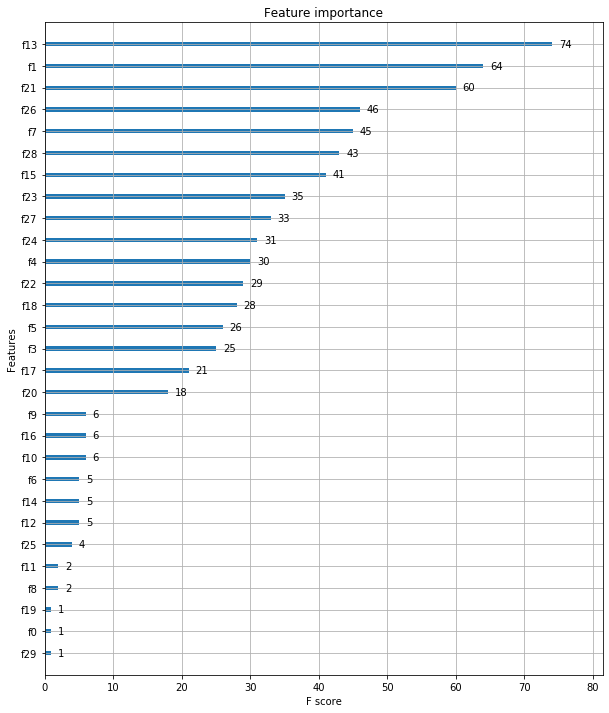

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

#### 예제 : Scikit Learn 방식

In [11]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400,
                           learning_rate=0.1,
                           max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test,w_preds)

0.9736842105263158

In [13]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(
    n_estimators=400,
    learning_rate=
)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, 
                early_stopping_rounds=100, 
                eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [15]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [16]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


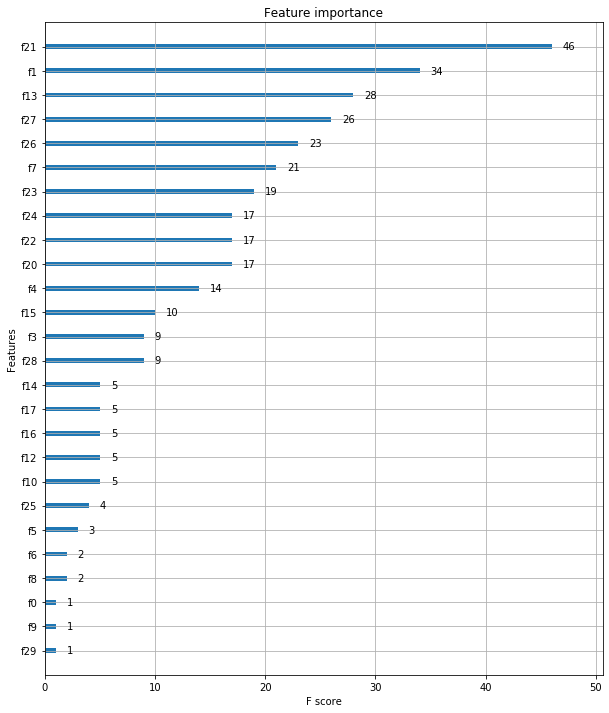

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

### LightGBM

<img src="img/16.png">

> **특징**<br>
>- 일반적인 트리들이 트리 깊이를 효과적으로 줄이기 위해서 균형트리 방식 사용 --> 그러면 균형이 잡힌 트리의 경우에는 overfitting에 보다 강건하다.But 시간이 오래 걸린다;;;;;<br>
>- LightGBM : 오랜 연산이 걸리는 균형을 포기하면서, 최대 손실값을 가지는 리프 노드를 지속적으로 분할하면서 트리이ㅡ 깊이가 깊어지고 비대칭적인 트리가 생성된다. 결국 예측 오류를 줄일 수 있는 것이 장점으로 된다. --> max_depth 가 매우 크게 가지게 된다!!

> **설치**<br>
> >conda install -c conda-forge lightgbm
<img src="img/17.png">


In [1]:
import lightgbm

print(lightgbm.__version__)

2.3.1


#### 주요 파라미터

> **주요 파라미터**<br>
>- num_iteration : 기본 100<br>
>- learning)rate : 기본 0.1<br>
>- max_depth : 기본 -1 / 0보다 작게 설정하면 깊이에 제한을두지 않겠다는 의미임.<br>
>- min_data_in_leaf : 기본 20, min_samples_leaf 와 같은 파라미터 <br>
>- num_leaves : 기본 3. 하나의 트리가 가질 수 있는 최대 리프의 개수 <br>
>- boosting : 기본 gbdt, rf 도 설정 가능함. <br>
>- bagging_fraction : 기본 1. 앞에서의 subsample과 유사함. <br>
>- feature)fraction : 기본 1. colsample)bytree와 같음. <br>
>- lambda_l2 : L2제약<br>
>- lambda_l1 : L1제약<br>

>-objective : 손싨함수 정의. xgboost 와 동일.

> **Overfitting을 피해보자..**<br>
>- num_leaves : 제일 주욯나 파라미터임. 크기가 커지면 정확도는 높아지지만, 트리의 깊이가 깊어지게 되어서 overfitting이 일어날 위험성이 있다.<br>
>- min_data_in_leaf :  큰 값으로 설정하면 overfitting 방지하게 된다. <br>
>- max_depth / num_leaves / min_data_in_leaf와 함께 조절하면서..<br>

> **기본적인 튜닝 방법** <br>
>- learning rate를 작게하면서, n_estimator를 크게 하는 것들..<br>
>- 위의 경우에 대해서 하면서 그러면 n_estimator이 큰 경우에는 L1, L2 규약을 사용하는 것을 추천

<img src="img/18.png">

#### 예제

In [2]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, 
                                                  target,
                                                  test_size=0.2, 
                                                  random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


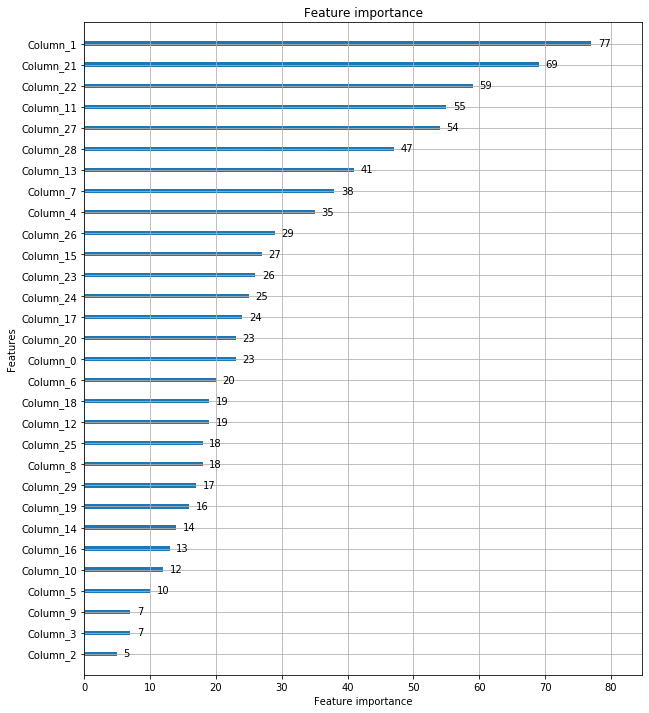

In [5]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## Stacking

> **특징**<br>
>- 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점 -> 2가지의 모델이 필요함(개별적인 모델, 이 개별 모델의 결과를 기반으로 다시 학습할 최종 메타 모델)<br>
>- 핵심 포인트 : 여러 개별 모델의 예측 데이터를 각각 스태킹 형ㅊ태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것임!!!!<br>
>- But 현실에서는 거의 사용하지 않음;;; 다만, 경진대회에서는 조금이라도 올리기 위해서 사용함!!!!!! & 많은 개별 모델이 필요함!!!!!!!!<br>
<img src="img/19.png">



#### 1번 해보기 
<img src="img/20.png">

In [6]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [7]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [8]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [9]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


In [10]:
pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [11]:
lr_final.fit(pred,y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


#### CV기반으로 해보자

<img src="img/21.png">
<img src="img/22.png">
<img src="img/23.png">
<img src="img/24.png">


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [14]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [15]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [16]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


#### mlxtend 패키지 활용해보자!!!

###### 설치

<img src="img/25.png">

###### 기본 사용\

In [14]:
from mlxtend.classifier import StackingClassifier

In [15]:
from sklearn import datasets


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings



iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target


warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

lr = LogisticRegression()
sclf = StackingClassifier(
    classifiers=[clf1,clf2,clf3],
    meta_classifier=lr
)

print('3-fold cross validation:\n')

for clf, label in zip([clf1,clf2,clf3,sclf], 
                      ["KNN","RF","NVB","Stacking"]):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [RF]
Accuracy: 0.91 (+/- 0.02) [NVB]
Accuracy: 0.95 (+/- 0.02) [Stacking]


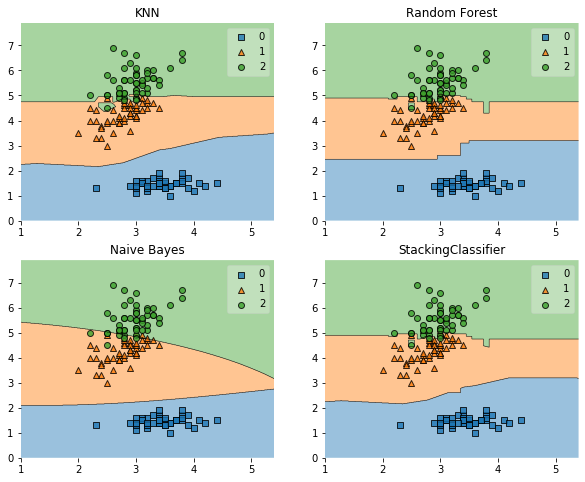

In [18]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

###### gridsearch와 함께 사용하자!!   --> 파라미터 이름에 대한 지정을 주의해야한다!!!!!!

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier


In [17]:
# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

lr = LogisticRegression()

sclf = StackingClassifier(
    classifiers=[clf1,clf2,clf3],
    meta_classifier=lr
)

params = {
    "kneighborsclassifier__n_neighbors":[1,5],
    "randomforestclassifier__n_estimators":[10,50],
    "meta_classifier__C":[0.1,10.0]
    
    }

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.933 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.927 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.933 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

* knn을 2개, random 1개

In [21]:
from sklearn.model_selection import GridSearchCV

# Initializing models

clf1 = ~~~
clf2 = ~~~
clf3 = ~~~
lr = ~~~
sclf = ~~~


params = {~~~}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.933 +/- 0.03 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.940 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.927 +/- 0.03 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.940 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.947 +/- 0.02 {'kneighborsclassifier-1__n_neighbors': 1, 'kneighborsclassifier-2__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestcla